# Introduction

Aim of the project:

Background - what is the Boston Housing Dataset?:


## Part 1 - Describe

### Preliminary investigations:


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as st
%matplotlib inline

In [2]:
#import Boston House Prices dataset 
from sklearn.datasets import load_boston

In [3]:
#Assign variable 'boston' to the dataset
boston = load_boston()

In [4]:
#take a look at the dataset
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
#That doesn't look good! Lets create a pandas dataframe from this data
#create pandas dataframe
df = pd.DataFrame(boston.data, columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'])

In [6]:
#We need to add the median value to the dataframe
df['MEDV'] = boston.target

From research online 16 datapoints have a 'medv' of 50. We will remove these as they likely contain missing or censored values.

In [7]:
df = df[df.MEDV !=50]

In [8]:
#We'll take a look at the first 20 rows
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## What do the headings mean?


In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
#check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

No null values found.

The 'medv' variable is our target variable, as it reflects the price of the property.

<function matplotlib.pyplot.show(*args, **kw)>

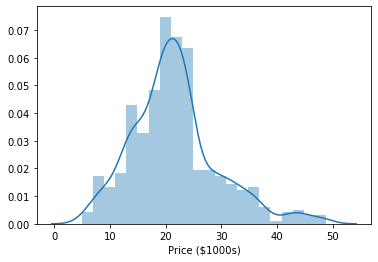

In [11]:
#plot medv values
sns.distplot(df['MEDV'])
plt.xlabel('Price ($1000s)')
plt.show


We can see from the above plot that the medv variable broadly follows a normal distribution, with some outliers. 

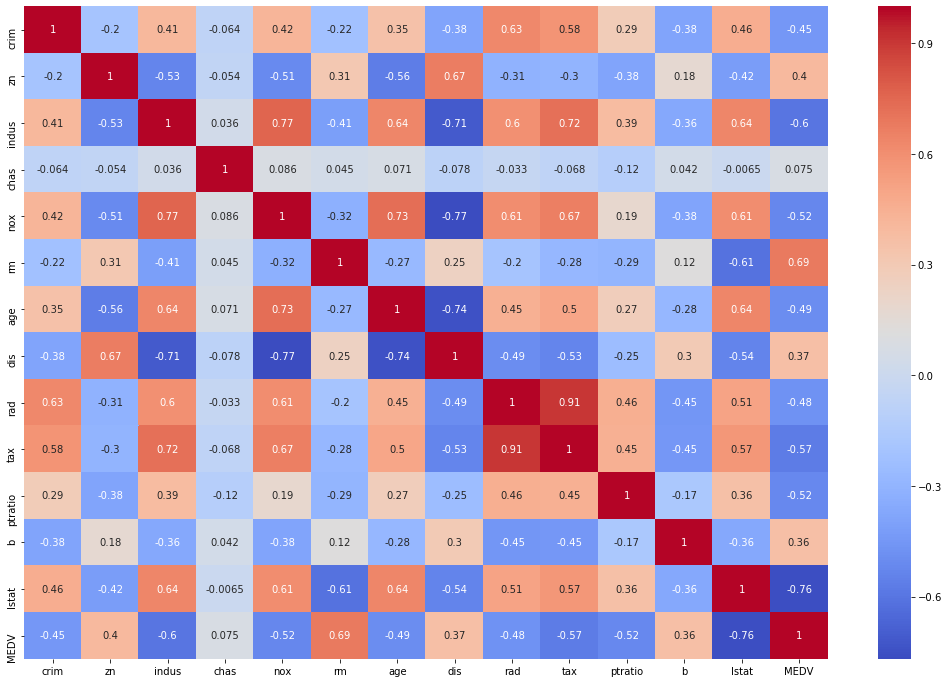

In [12]:
#show correlation between variables
ax, fig = plt.subplots(figsize = (18,12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()
#blues show a negative correlation, oranges/reds a positive one

From the plot above we can see that the variable with the strongest positive correlation is no. of rooms, and the one with the strongest negative correlation is % of lower status of population. Intuitively it is reasonable that houses with more rooms would cost more, likewise it is a fair assumption that areas with a higher proportion of lower socio-economic residents would have lower prices housing on average. From this there doesn't appear to be a strong correlation between the 'CHAS' variable and house prices.

Finally in this section we'll take a look at the prices variable


In [13]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)
prices.describe()
#features.describe()

count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: MEDV, dtype: float64

### Part 2 - Inferential Statistics

The aim of this section is to determine whether there is a significant difference in median prices of houses that are along the Charles river and those that are not. The Null Hypothesis will be that there is no difference between house prices whether or not they are along the Charles River. Lets take a look at the variable 'chas' which is the indicator as to whether the house lies along the river or not. '1' means it does, '0' means it does not.

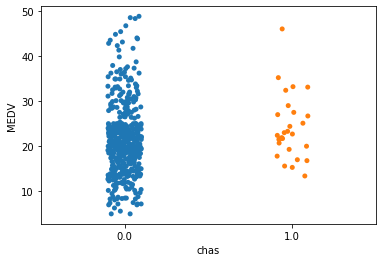

In [14]:
sns.stripplot(x="chas", y = 'MEDV', data = df)



From observing the scatterplot above we can see that there are much fewer properties bordering the Charles river than properties that don't border it; it also looks like the highest priced properties are away from the river.

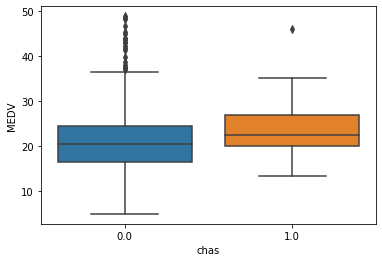

In [15]:
sns.boxplot(x = "chas", y = "MEDV", data = df)

From the boxplot above we can see that there are a lot of outliers in the properties not bordering the river, and the median price of houses bordering the river appears greater than that of houses not bordering it.
Our null hypothesis is that there is statistically no differenct between the median prices of houses that border the Charles River and those that dont'. Our alternative hypothesis is that there is a statistically significant difference between the median prices of houses that border the Charles river and those that don't. Lets seperate the variable into its components

In [20]:
for col in df.columns:
    print(col)
df = df.drop(['crim','rm','dis','zn','indus','nox','age','rad','tax','ptratio','b','lstat'], axis =1)






chas
MEDV


KeyError: "['crim' 'rm' 'dis' 'zn' 'indus' 'nox' 'age' 'rad' 'tax' 'ptratio' 'b'\n 'lstat'] not found in axis"

In [21]:
#group data in chas variable by 1 or 0, either bordering the river or not
charles = df.groupby('chas')
#look at this dataframe
charles.describe().head()
#isolate medv


MEDV                                                   
      count       mean       std   min   25%   50%   75%   max
chas                                                          
0.0   461.0  21.488503  7.898848   5.0  16.5  20.6  24.5  48.8
1.0    29.0  23.979310  7.024161  13.4  20.0  22.4  27.0  46.0

### Part 3 - Predict

The aim of this section is to use keras to create a neural network that can predict the median house price based on other variables in the dataset. 

In [28]:
import tensorflow as tf
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


#### References:

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 <br> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html <br>
